Notebook to solve idealized wave problem. Barotropic current interacting with a step.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Solving this equation:

 $-\sigma^2\nabla^2\psi + N^2\frac{\partial^2}{\partial x^2}\psi = 0 $ or 

$\frac{\partial^2}{\partial z^2}\psi - \frac{N^2-\sigma^2}{\sigma^2}\frac{\partial^2}{\partial x^2}\psi = 0 $

Boundary conditiions are no flow through sloid boundaries so $\psi=0$.

Assume $\psi = \psi_b + \psi'$ barotopic and baroclinic parts.

Set $\psi_b = zc\sin(kx)$

where $c = \sqrt{gh}$ and $k=\sigma/c$. Then the differentatial equation simplifies to:

$\frac{\partial^2}{\partial z^2}\psi' -\frac{N^2 -\sigma^2}{\sigma^2}\frac{\partial^2}{\partial x^2}\psi' = 
\frac{N^2 -\sigma^2}{\sigma^2}\frac{\partial^2}{\partial x^2}\psi_b$.

We can subsitute these expressions for the derivaives of $\psi_b$

$\frac{\partial^2}{\partial x^2}\psi_b = - zck^2\sin(kx)$ 


So, further simplication gives
$\frac{\partial^2}{\partial z^2}\psi' -\frac{N^2 -\sigma^2}{\sigma^2}\frac{\partial^2}{\partial x^2}\psi' = 
-k^2\frac{N^2 -\sigma^2}{\sigma^2}\psi_b$.

Note that the domain depth $h$ is piecewise constant and so $\psi_b, c, k$ are piecewise too.

Setting up constants:

In [2]:
L = 20e3 #units m
H = 50 # units m
h0 = 25 #units m
N2 = 0.001 #units 1/s^2
g = 10 #units m/s^2

Nx = 100
Nz = 50
dx = L/Nx
dz = H/Nz

sigma  = 2*np.pi/(12*3600) #units 1/s

x = np.arange(0, L,dx)
z =  np.arange(0, H,dz)

#meshgrid
xx ,zz = np.meshgrid(x,z)

Set up topography and currents...

In [3]:
x0 = L/2
h = h0*(xx<x0) + H*(xx>=x0)

c= np.sqrt(g*h)
k = sigma/c

psi_b = zz*c*np.sin(k*xx)


Initialize $\psi'$ = - $\psi_b$

[0, 20000.0, 50, 0]

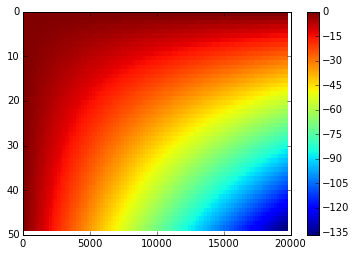

In [4]:
psi_c = -psi_b
plt.pcolormesh(xx,zz,psi_c)
plt.colorbar()
plt.axis([0,L, H,0])


Numerical integration

In [5]:
def integrate(psi):
    
    for i in np.arange(2, Nx-1):
        for j in np.arange(1,Nz-1):
            if zz[j,i+1] > h[j,i+1]:
                psi[j,i+1] = -psi_b[j,i+1]
            else: 
                psi[j, i+1] = 2*psi[j,i] - psi[j,i-1] + \
                          dx**2/dz**2*sigma**2/(N2-sigma**2)*(psi[j-1,i] - 2*psi[j,i] + psi[j+1, i]) + \
                          k[j,i]**2*dx**2*psi_b[j,i]

    
    return psi

[0, 20000.0, 50, 0]

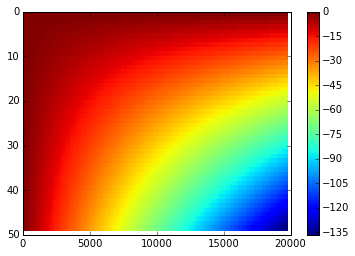

In [6]:
psi_int = integrate(psi_c)
plt.pcolormesh(xx,zz,psi_int)
plt.colorbar()
plt.axis([0,L, H,0])